In [1]:
import sys
assert sys.version_info >= (3,5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import numpy as np
import os

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

In [5]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [6]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path=os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
#Download the data
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets", "")

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
#Load the data
#It returns a Pandas dataframe object containing all the data.
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(HOUSING_PATH, "housing.csv")
    return pd.read_csv(csv_path)

In [10]:
#head() shows the top 5 rows of the table
#Here each row represents on district
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
#Get quick description of data 
#particularly total number of rows, each attributes type and number of non-null values.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
#This method tells the categories present in the column and number of rows having that particular category
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
#Shows summary of numerical attributes
#NULL values are ignored.
#Std - standard  deviation shows how dispersed the values are
#25% percentile - 1st quartile
#50% percentile - median
#75% percentile - 3rd quartile
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


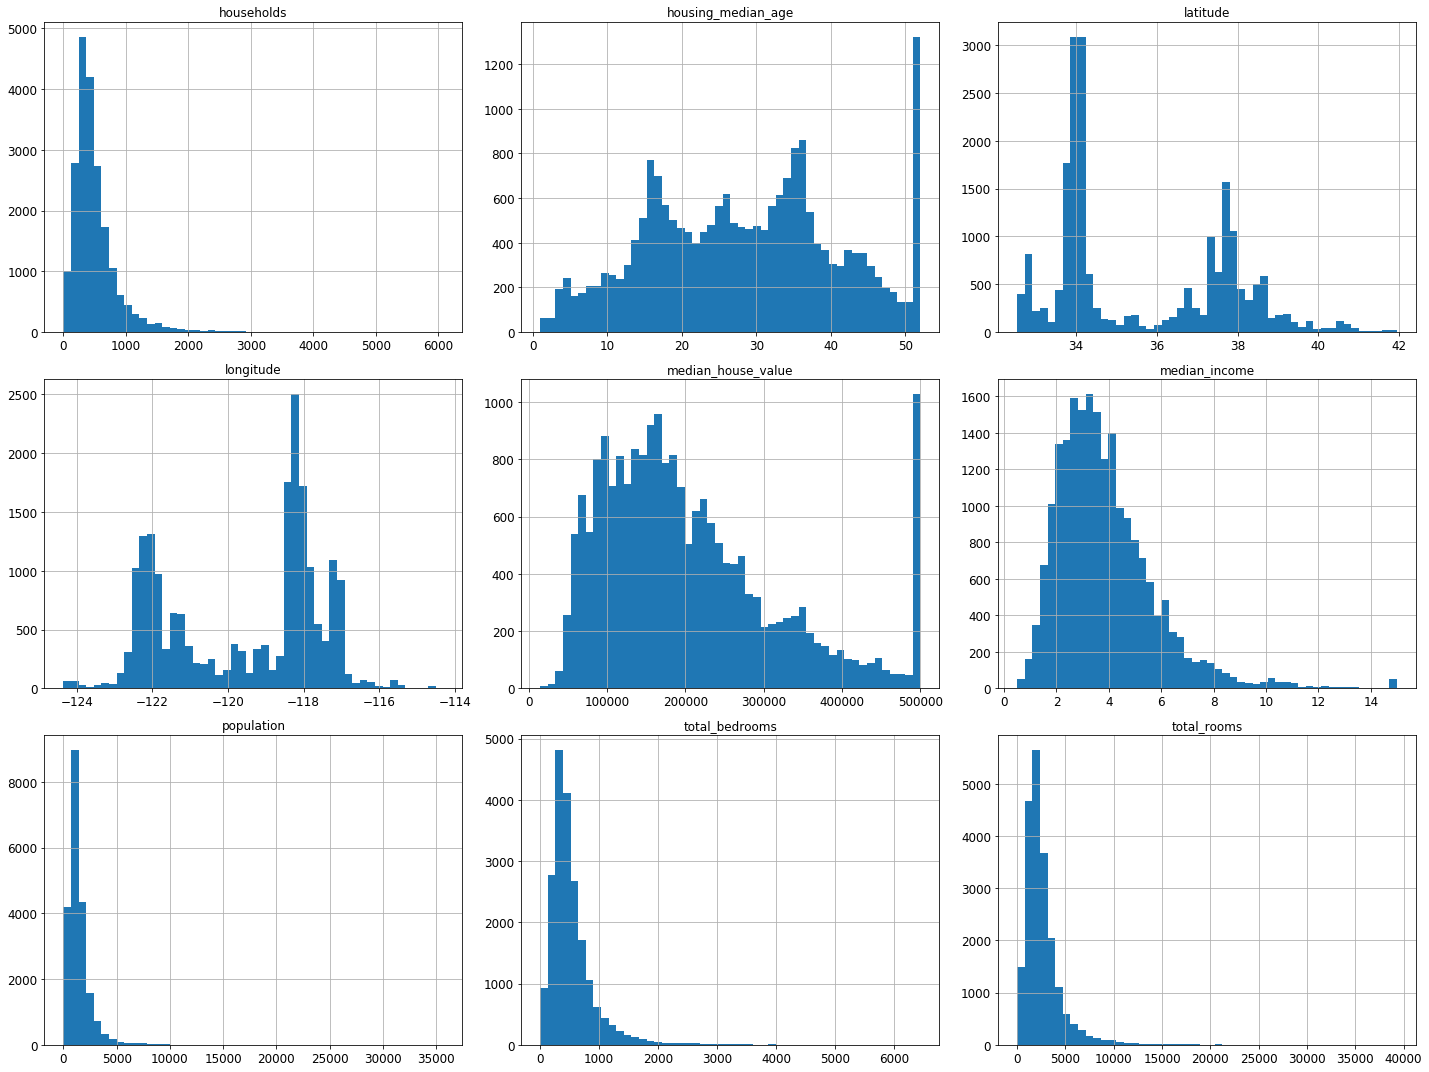

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [15]:
#create test set
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


In [17]:
#Using row index as an identifier

In [18]:
#Compute hash of each instance's identifier
#Put that instance in test set if its hash is <= 20% of max hash value
#This ensures hash test set is consistent across multiple runs even after refreshing the dataset.
#crc - Cyclic Redundancy Check (computes crc checksum of data)
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
housing_with_id = housing.reset_index()   #Adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [20]:
#Using stable feature as an identifier

In [21]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [22]:
#Using Scikit-Learn provided function to split dataset into multiple subsets

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

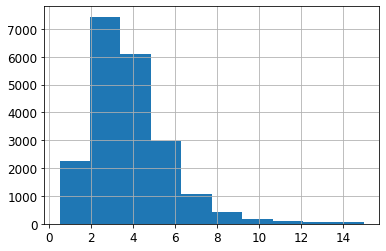

In [24]:
housing["median_income"].hist()

In [25]:
#Creating an income category attribute with 5 cateogires
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

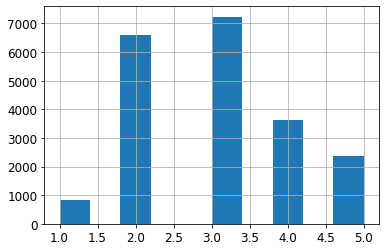

In [26]:
housing["income_cat"].hist()

In [27]:
#Stratified Sampling based on income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [28]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [29]:
#Comparing overall, randomw aplitted and stratified splitted data to check how identical it is
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=43)
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set)
}).sort_index()

compare_props["Rand. %error"] = 100*compare_props["Random"]/compare_props["Overall"] - 100
compare_props["Strat. &error"] = 100*compare_props["Stratified"]/compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. &error
1,0.039826,0.039729,0.039971,0.364964,-0.243309
2,0.318847,0.318798,0.314922,-1.230816,-0.015195
3,0.350581,0.350533,0.347384,-0.912106,-0.013820
4,0.176308,0.176357,0.179021,1.538884,0.027480
5,0.114438,0.114583,0.118702,3.725656,0.127011


In [30]:
#remove income_cat column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [31]:
#Creating a copy
housing = strat_train_set.copy()

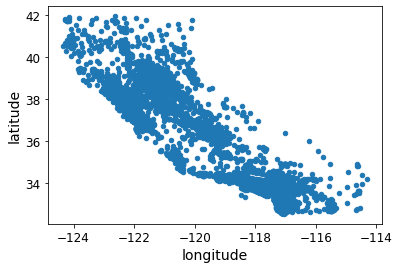

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude")

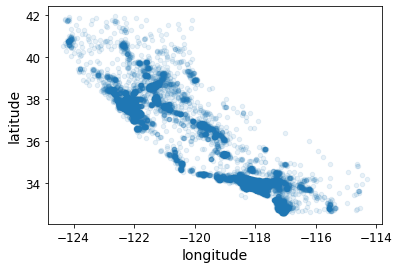

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Saving figure housing_prices_scatterplot


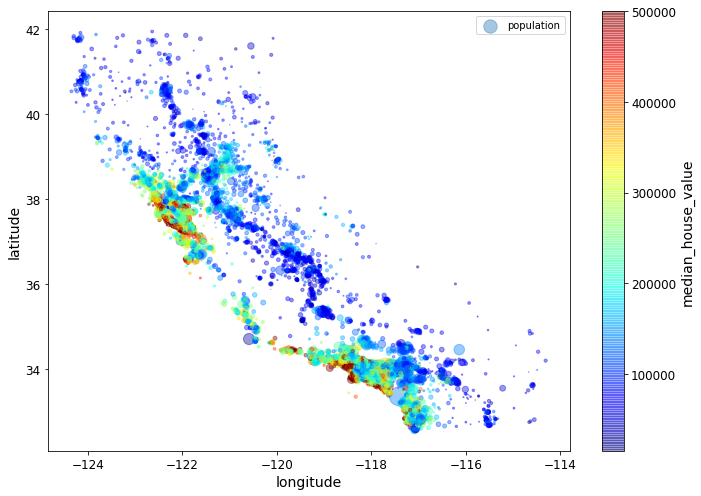

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [35]:
#Computing standard correlation coefficient
corr_matrix = housing.corr()

In [36]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000270844A0F60>,
      dtype=object)

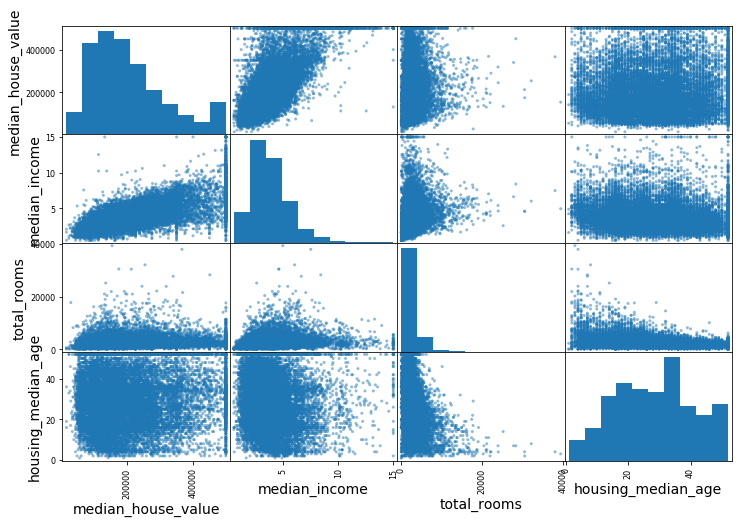

In [37]:
#Using Pandas scatter_matrix function to know the correlation
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

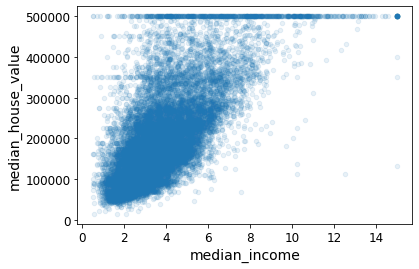

In [38]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [39]:
#Creating new attribute combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [40]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [41]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [42]:
#Data Cleaning - filled the na values total_bedrooms attribute with the median
housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms", axis=1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [43]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [44]:
#Taking care of the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#Creating copy of data wihtout text attribute
housing_num = housing.drop("ocean_proximity", axis=1) #1 is for column

imputer.fit(housing_num)

#imputer saves the computed median of all numerical attributes in its statistics_ variable.
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [45]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [46]:
#imputer transforms the training set by replaceing the missing values.
X = imputer.transform(housing_num)

In [47]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [48]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [49]:
#Converting text to number 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

#the output SciPy sparse matrix stores the location of the non zero element instead of storing the entire matrix of 0s and 1.

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [52]:
#to convert to a dense numpy array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [53]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [54]:
#Creating a custom transformer to add the combined attributes described earlier

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [55]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [56]:

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
]) #Both the transformers must return the same number of rows.

#OneHotEncoder returns sparse matrix and num_pipeline returns dense matrix.0
#Column Transformer estimates the density of the final matrix and returns a sparse matrix
#if the density is lower than a agiven threshold (by default sparse_threshold = 0.3)

housing_prepared = full_pipeline.fit_transform(housing)

In [57]:
#Training and Evaluating on the Traaining Set

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [59]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [60]:
#Measuring the RMSE of the model
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [61]:
#Trying a different model and LinearRegression gave a large error
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [62]:
#Using K fold Cross validation feature
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [63]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [64]:
display_scores(tree_rmse_scores)

Scores: [69177.96924579 67507.30821111 70162.69418656 68983.08310895
 69794.50526477 74859.33192204 70389.19447707 70267.80480194
 76202.03094226 69616.83707557]
Mean: 70696.075923608
Standard deviation: 2561.154965358573


In [65]:
#COmputing the same values as above for Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798346


In [66]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv = 10)
forest_rmse = np.sqrt(-forest_mse)
forest_rmse

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([52370.6859202 , 49728.36223862, 53549.66896062, 54811.18489749,
       52894.81010623, 55449.63424405, 51528.67391092, 50322.09156837,
       55274.65798173, 52796.54536012])

In [67]:
display_scores(forest_rmse)

Scores: [52370.6859202  49728.36223862 53549.66896062 54811.18489749
 52894.81010623 55449.63424405 51528.67391092 50322.09156837
 55274.65798173 52796.54536012]
Mean: 52872.63151883524
Standard deviation: 1873.0504223934593


In [68]:
#Fine tuning the model using Grid Search CV
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
#cv=5 => train the model 5 times.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [69]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [70]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
#Evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63572.37332084504 {'max_features': 2, 'n_estimators': 3}
55511.8246723105 {'max_features': 2, 'n_estimators': 10}
53033.63039422266 {'max_features': 2, 'n_estimators': 30}
59913.294560825656 {'max_features': 4, 'n_estimators': 3}
52668.87881986379 {'max_features': 4, 'n_estimators': 10}
50418.313467699336 {'max_features': 4, 'n_estimators': 30}
59173.67647197359 {'max_features': 6, 'n_estimators': 3}
52402.82550459646 {'max_features': 6, 'n_estimators': 10}
50153.04595652682 {'max_features': 6, 'n_estimators': 30}
59242.422903680825 {'max_features': 8, 'n_estimators': 3}
52317.81001802439 {'max_features': 8, 'n_estimators': 10}
50183.29553093185 {'max_features': 8, 'n_estimators': 30}
63369.555627064925 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54197.8095946169 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60590.64681519746 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52464.616815740206 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [72]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.25680703e-02, 6.80299585e-02, 4.16161278e-02, 1.93973148e-02,
       1.56738662e-02, 1.77576422e-02, 1.55485384e-02, 2.93369775e-01,
       5.57055131e-02, 1.08982036e-01, 1.10800006e-01, 1.30854064e-02,
       1.56748127e-01, 6.57557242e-05, 5.43573601e-03, 5.21612624e-03])

In [73]:
extra_attribs = ["rooms_per_hdold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2933697749691357, 'median_income'),
 (0.15674812722314685, 'INLAND'),
 (0.11080000604076487, 'bedrooms_per_room'),
 (0.10898203611392113, 'pop_per_hhold'),
 (0.07256807031346359, 'longitude'),
 (0.06802995852887485, 'latitude'),
 (0.0557055130717383, 'rooms_per_hdold'),
 (0.041616127803465956, 'housing_median_age'),
 (0.019397314799740283, 'total_rooms'),
 (0.01775764220398462, 'population'),
 (0.015673866190210564, 'total_bedrooms'),
 (0.015548538405568711, 'households'),
 (0.013085406362601084, '<1H OCEAN'),
 (0.005435736011094679, 'NEAR BAY'),
 (0.005216126238138379, 'NEAR OCEAN'),
 (6.575572415046925e-05, 'ISLAND')]

In [77]:
#Evaluating the final model
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47860.24753932791

In [78]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45896.71758904, 49746.33557965])